                         
   ##                                   Loan-Defaulter Prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


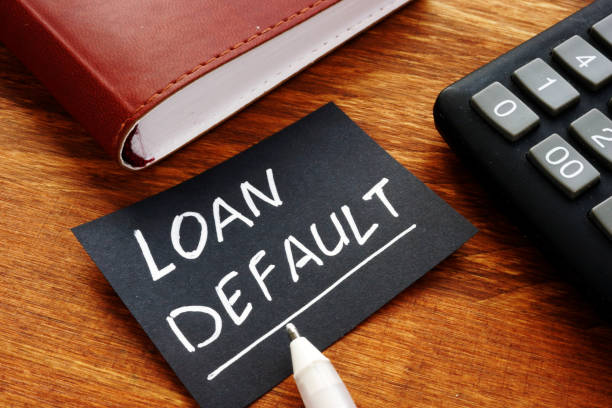

**Description:**
Banks earn a major revenue from lending loans.But it is often associated with risk.The borrower's may default on the loan.To migitate this issue, the banks have decided to use Machine learning to overcome this issue.They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrower's income, gender, loan pupose etc.

**Solution:**
1. Exploratory Data Analysis, Preprocessing and Cleaning Up of Data.
2. By Assessing the performance of multiple Supervised Learning Algorithm, We'd build a classification model to predict whether the loan borrower will default or not.
3. Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## **1.DATA EXPLORATION**

##### Checking for datatypes and skewness of all columns

In [ ]:
df.shape




(148670, 34)

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.rename(columns = {'co-applicant_credit_type':'co_applicant_credit_type'})


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# **2. DATA CLEANING**

In [ ]:
# a list of redundant and irrevant columns to drop
to_drop = ["ID", "year",'co-applicant_credit_type']#, 'Region', 'age', 'credit_type', 'total_units', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender']

# Drop those columns from the dataset
df = df.drop(to_drop, axis = 1)


df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,9480.0,EXP,834,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,11880.0,EXP,587,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,10440.0,CRIF,602,25-34,not_inst,91.886544,North,direct,0,39.0


### Plotting the NULL Values distribution for each columns

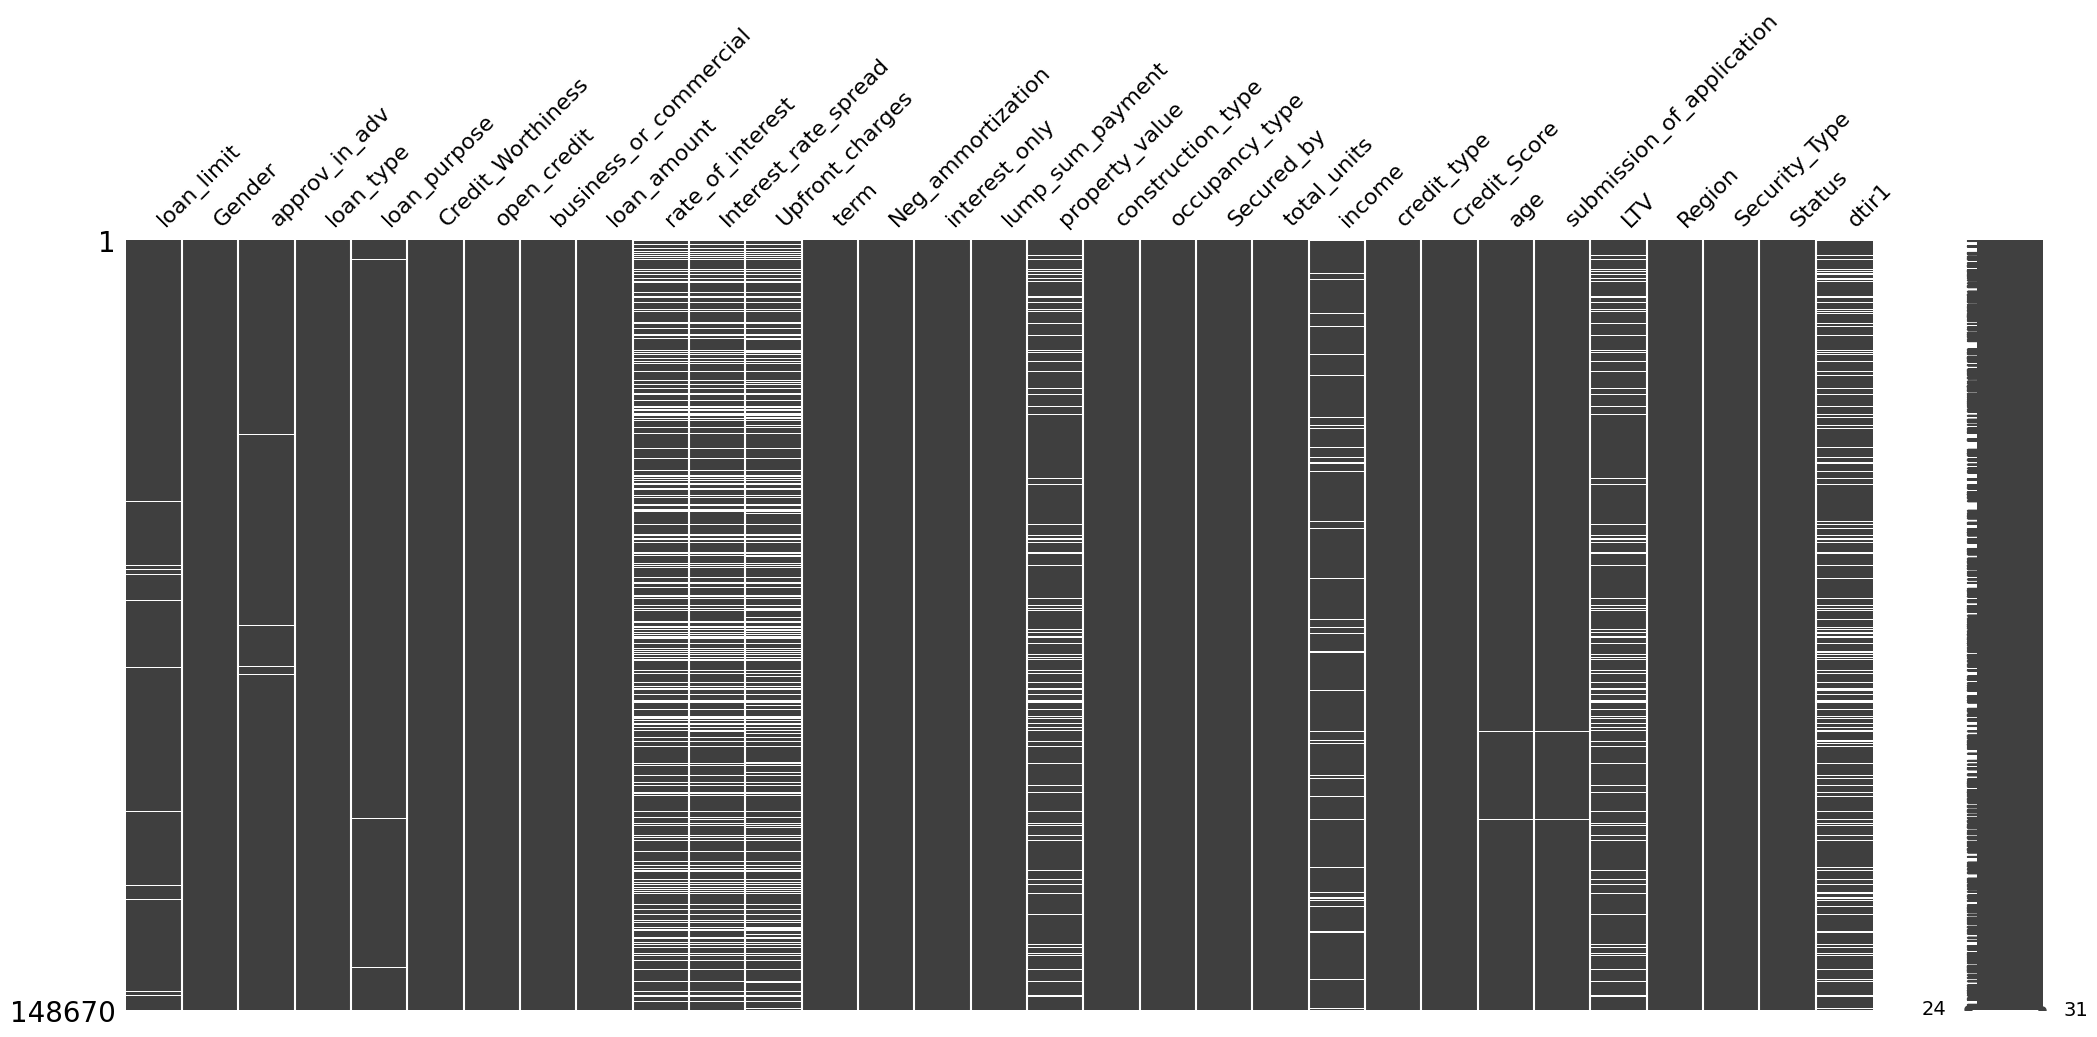

In [ ]:
msno.matrix(df)
plt.show()

# this plot isn't intuitive and understanable

### **FILTERING OUT NUMERICAL COLUMNS FROM CATEROGICAL COLUMNS**

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns # why???? but it's a manipulation technic

categorical_columns = df.select_dtypes(include='object').columns

In [ ]:
numerical_columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [ ]:
categorical_columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'age', 'submission_of_application', 'Region',
       'Security_Type'],
      dtype='object')

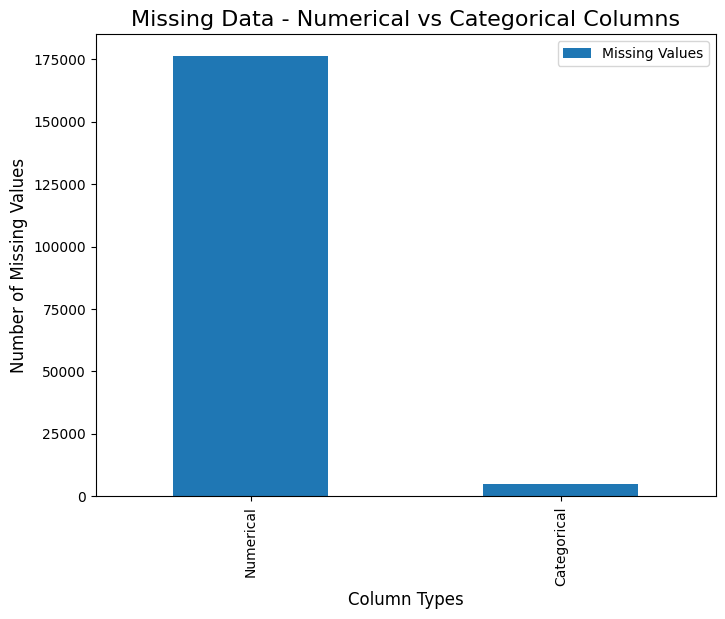

<function __main__.show_missing_data_distribution()>

In [ ]:
def show_missing_data_distribution():
    num_missing = df[numerical_columns].isnull().sum().sum()
    cat_missing = df[categorical_columns].isnull().sum().sum()

    # Creating a DataFrame with the missing values count
    missing_data = pd.DataFrame({'Columns': ['Numerical', 'Categorical'],
                                 'Missing Values': [num_missing, cat_missing]})

    # Plotting the missing data
    missing_data.plot(x='Columns', y='Missing Values', kind='bar', figsize=(8, 6))
    plt.xlabel('Column Types', fontsize=12)
    plt.ylabel('Number of Missing Values', fontsize=12)
    plt.title('Missing Data - Numerical vs Categorical Columns', fontsize=16)
    plt.show()
    return show_missing_data_distribution

show_missing_data_distribution()


#a transformation to the y-axis will make this a bit okay, values are too large.

### Sum of NULL values per column.

In [ ]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type       

# Writing a function to calculate the percentage of missing data

In [ ]:
def calculate_percentage_of_missing_data():
    missing_data = df.isnull().sum()
    missing_data_percentage = missing_data /len(df) *100
    missing_data_percentage = pd.DataFrame({"Column":missing_data_percentage.index,"Percentage of Missing Data":missing_data_percentage.values.round(2) })
    missing_data_percentage["Percentage of Missing Data"] = missing_data_percentage["Percentage of Missing Data"].astype(str) + "%"
    return missing_data_percentage


calculate_percentage_of_missing_data()

,Column,Percentage of Missing Data
0,loan_limit,2.25%
1,Gender,0.0%
2,approv_in_adv,0.61%
3,loan_type,0.0%
4,loan_purpose,0.09%
5,Credit_Worthiness,0.0%
6,open_credit,0.0%
7,business_or_commercial,0.0%
8,loan_amount,0.0%
9,rate_of_interest,24.51%


# Dropping Rows in Columns with Less Than 15% of it's Data Missing

In [ ]:
df=df.dropna(subset=['loan_purpose', 'Neg_ammortization', 'term', 'LTV', 'loan_limit', 'approv_in_adv', 'property_value', 'income', 'age', 'submission_of_application'])

calculate_percentage_of_missing_data()



,Column,Percentage of Missing Data
0,loan_limit,0.0%
1,Gender,0.0%
2,approv_in_adv,0.0%
3,loan_type,0.0%
4,loan_purpose,0.0%
5,Credit_Worthiness,0.0%
6,open_credit,0.0%
7,business_or_commercial,0.0%
8,loan_amount,0.0%
9,rate_of_interest,16.3%


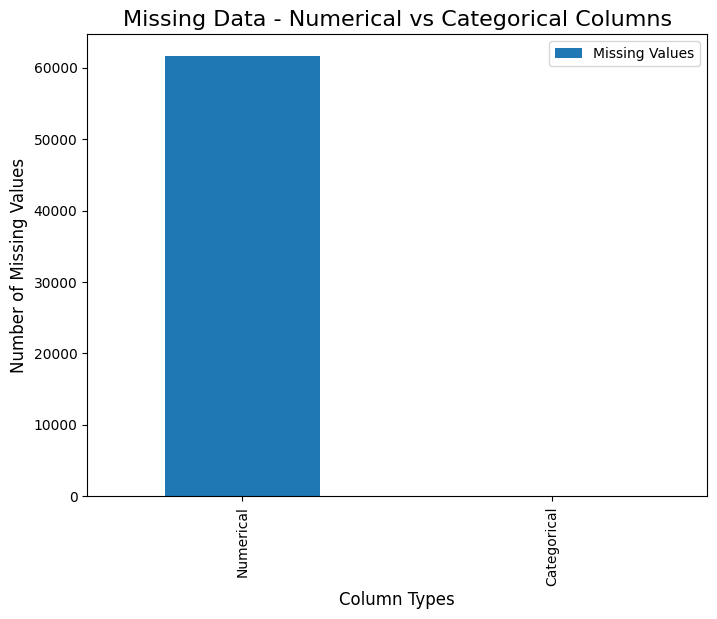

<function __main__.show_missing_data_distribution()>

In [ ]:
show_missing_data_distribution()

In [ ]:
df.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.205260e+05,100879.000000,100879.000000,98187.000000,120526.000000,1.205260e+05,120526.000000,120526.000000,120526.000000,120526.000000,120526.000000
mean,3.293845e+05,4.086293,0.469483,3389.206553,333.673780,5.041113e+05,7018.242703,699.699932,71.471044,0.163010,37.724922
std,1.825916e+05,0.546426,0.485365,3279.884804,59.963012,3.690127e+05,6504.565060,115.858601,18.918642,0.369377,10.546560
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,1.800000e+04,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.750000,0.105900,822.000000,360.000000,2.780000e+05,3780.000000,599.000000,59.769539,0.000000,31.000000
50%,2.965000e+05,3.990000,0.402000,2800.910000,360.000000,4.180000e+05,5820.000000,699.000000,74.234694,0.000000,39.000000
75%,4.365000e+05,4.500000,0.780700,4982.500000,360.000000,6.280000e+05,8580.000000,800.000000,84.763314,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,263.541667,1.000000,61.000000


The above illustrates that none of the categorical columns have missing data.
Therefore, We shall advance by selecting an imputation method that works well with numerical features

# Imputation of missing numerical columns - Mean Method

<ipython-input-107-eef566d5f51b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


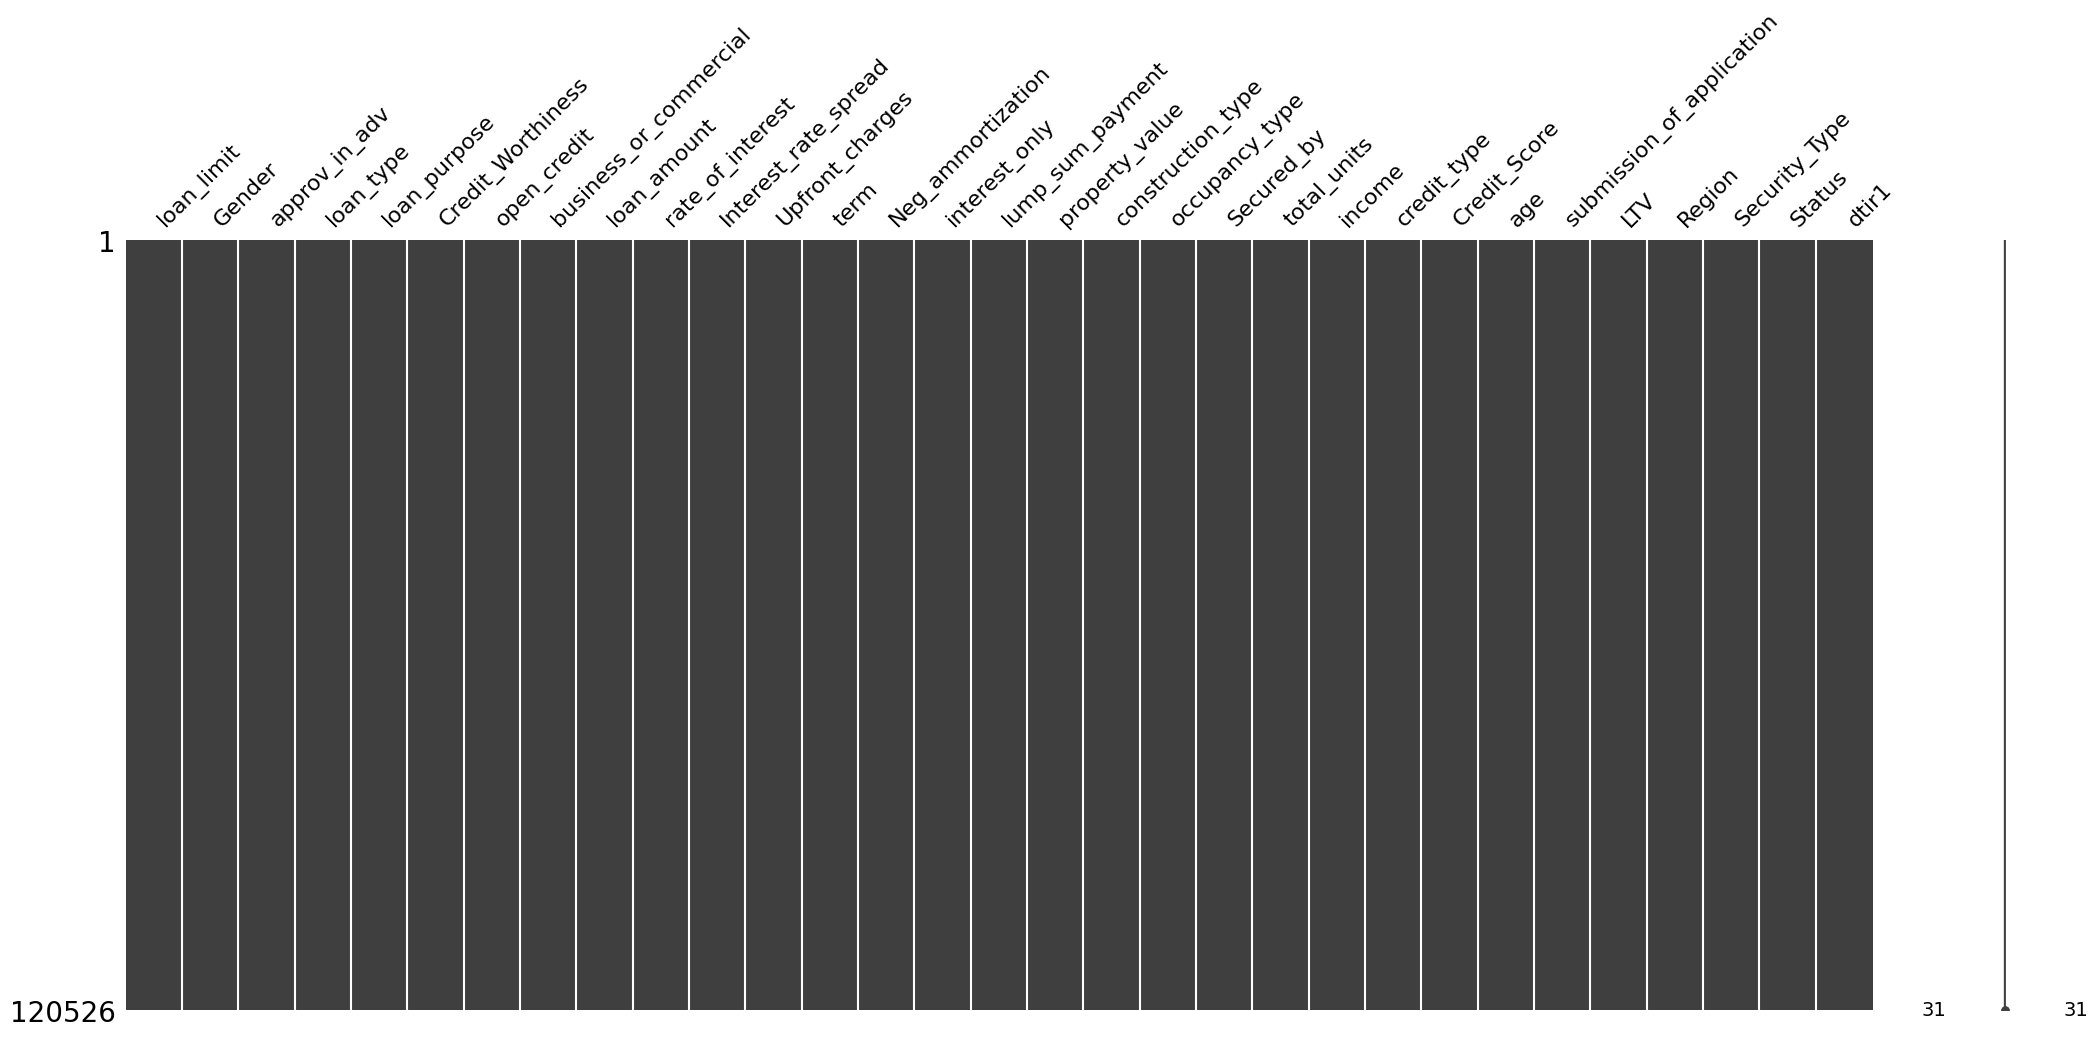

In [ ]:

def impute_mean(df):
    column_means = df.mean()
    df = df.fillna(column_means)
    return df

df = impute_mean(df)

# Checking if Imputation worked correctly ...
calculate_percentage_of_missing_data()

msno.matrix(df)
plt.show();


## **3. STANDARDIZATION**

### Using Standard Scaler from Sci-kit to scale Numerical Columns to handle high Variance

In [ ]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.var())


df[numerical_columns]

loan_amount             1.000008
rate_of_interest        1.000008
Interest_rate_spread    1.000008
Upfront_charges         1.000008
term                    1.000008
property_value          1.000008
income                  1.000008
Credit_Score            1.000008
LTV                     1.000008
Status                  1.000008
dtir1                   1.000008
dtype: float64


<ipython-input-108-2326327a3d39>:9: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())


,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,-1.165910,0.000000,0.000000,-1.536127e-16,0.439043,-1.046340,-0.811471,0.503202,1.440795,2.265960,0.689809
2,0.422340,0.947589,-0.606882,-9.438772e-01,0.439043,0.010538,0.378468,1.159177,0.451865,-0.441314,0.784627
3,0.696177,0.327474,0.476342,-1.536127e-16,0.439043,0.417030,0.747441,-0.972741,-0.110693,-0.441314,0.405354
4,2.010591,-0.172619,-0.372221,-1.144867e+00,0.439043,0.688024,0.526057,-0.843272,1.079125,-0.441314,0.120900
5,2.065358,-0.192623,-0.714304,-1.019882e+00,0.439043,1.365511,0.470711,1.418114,-0.073037,-0.441314,0.215718
...,...,...,...,...,...,...,...,...,...,...,...
148665,0.586642,-1.922943,-0.478291,2.219600e+00,-2.562820,0.281533,0.129411,-0.351291,0.017005,-0.441314,0.974263
148666,1.408151,2.207822,0.866844,-1.144867e+00,0.439043,0.769323,0.018719,-1.128103,0.156349,-0.441314,-2.154733
148667,0.641409,-1.922943,-0.873522,-7.305105e-01,-2.562820,0.606726,-0.018178,0.019852,-0.535909,-0.441314,1.069081
148668,-0.727772,-1.172804,0.254293,3.155450e-01,-2.562820,-0.612749,0.018719,0.321946,-0.041631,-0.441314,-0.827280


### **Checking For Class Distribution**

In [ ]:
#converting our target label into an object type.... so we can apply binary encoding to it.
df['Status']= df['Status'].astype(object)

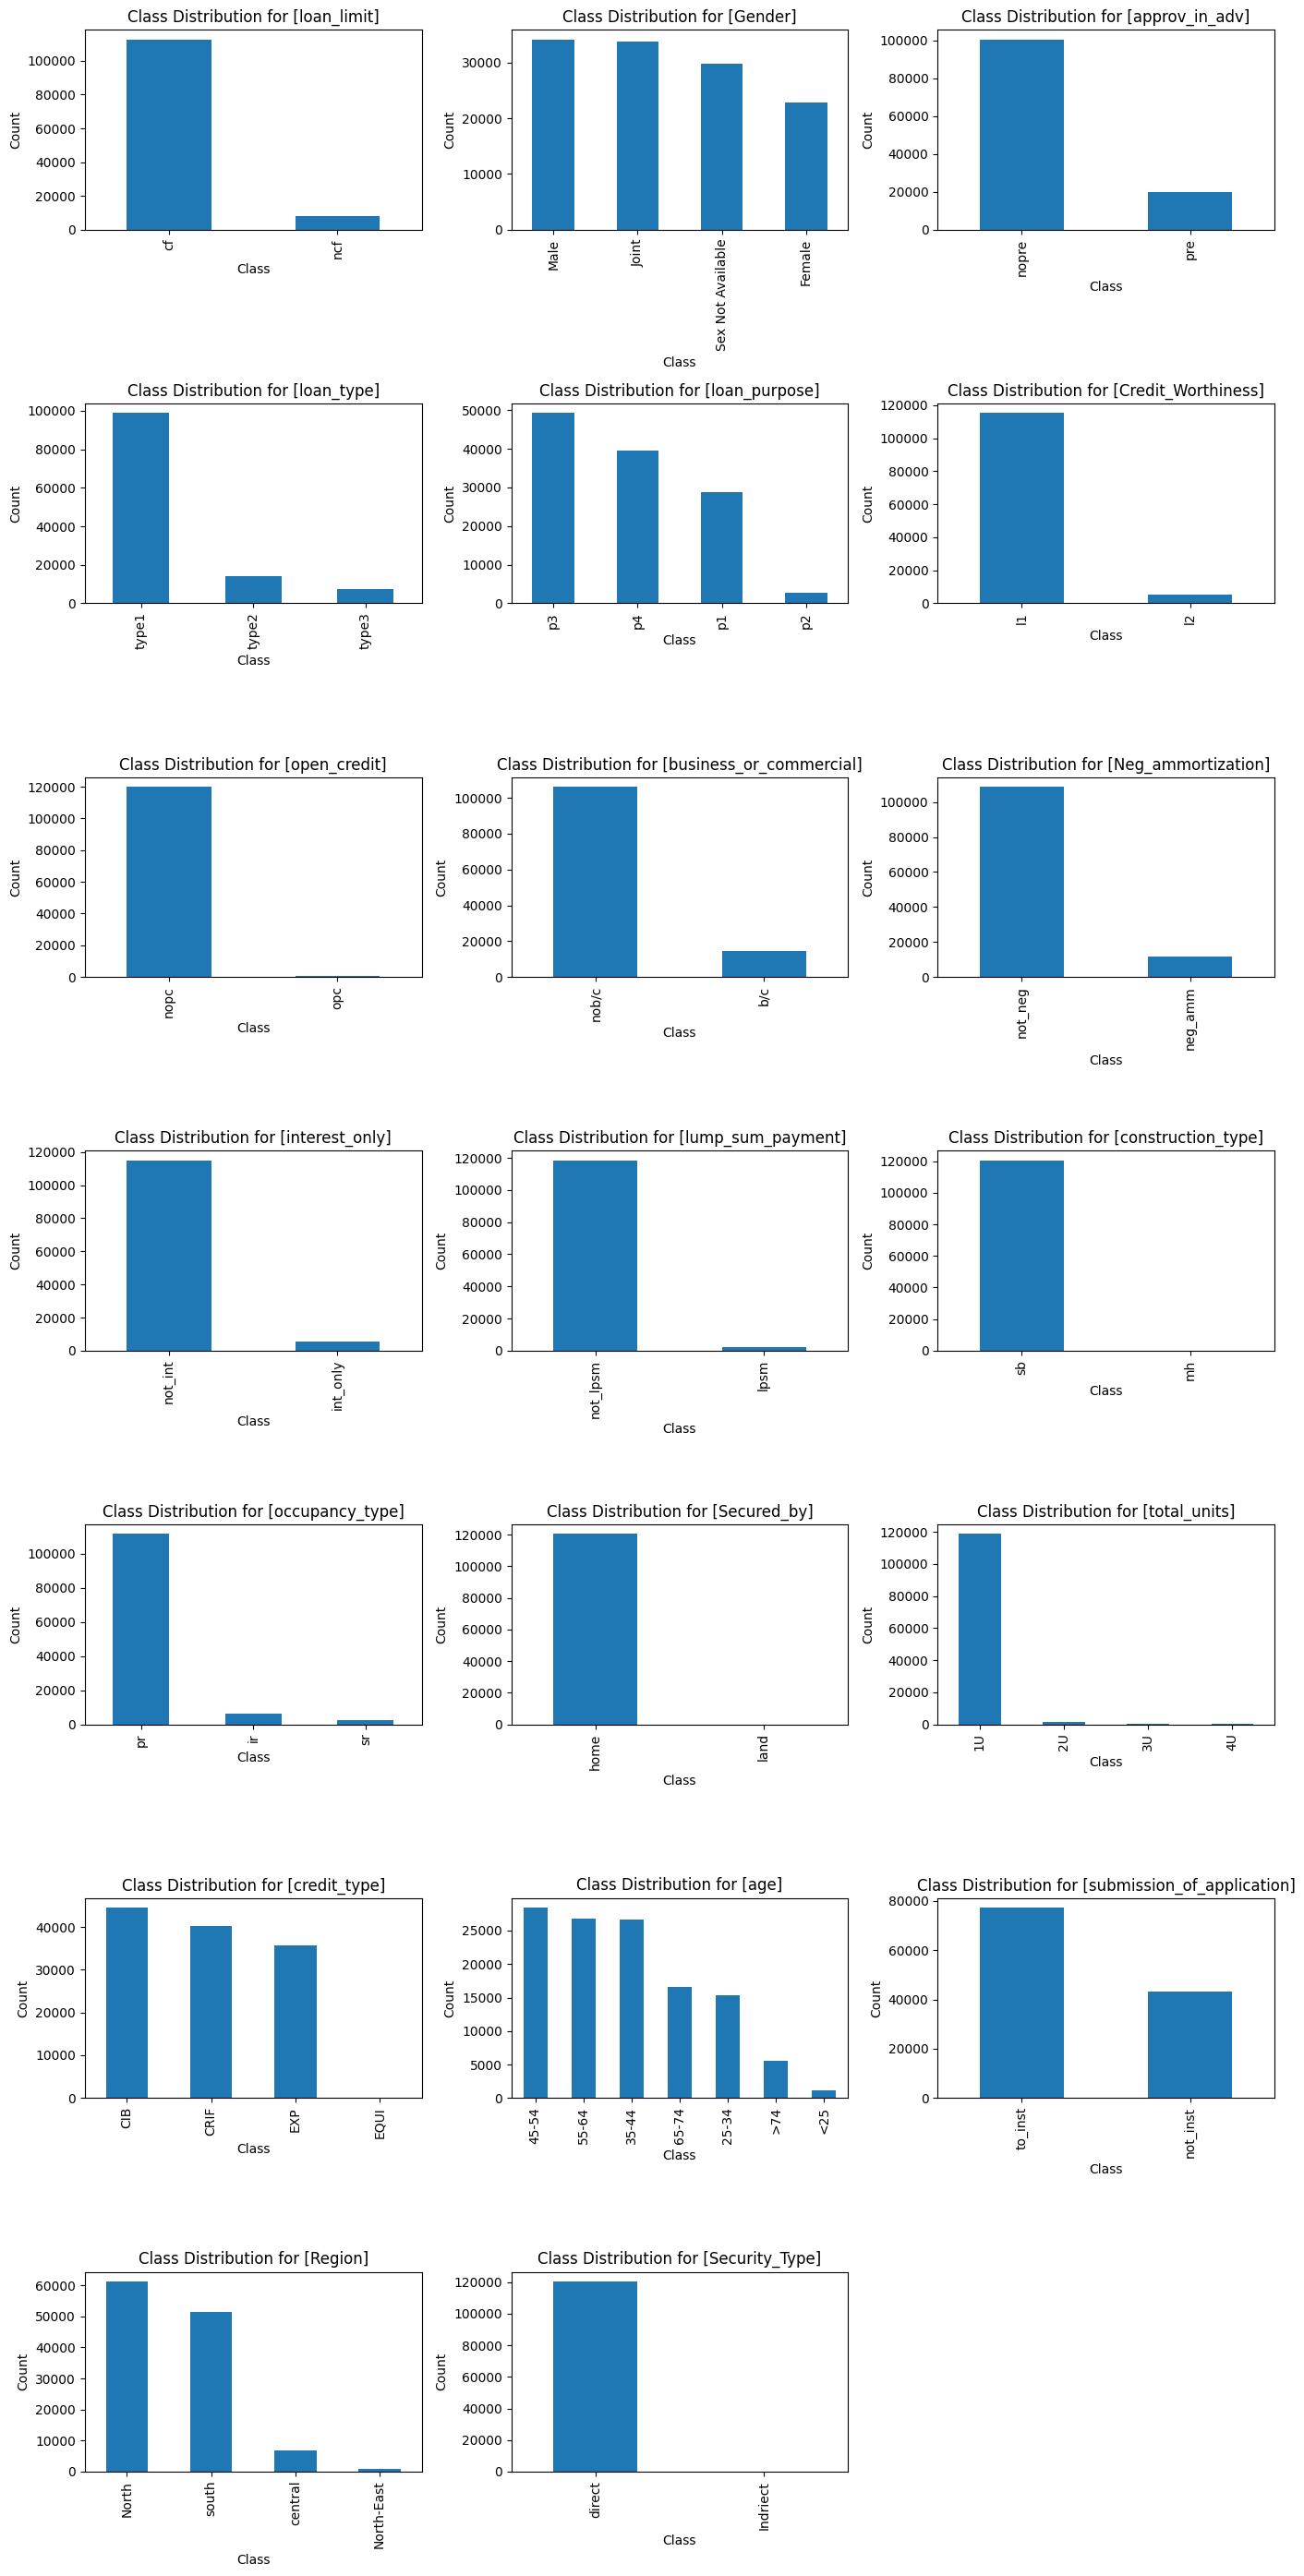

In [ ]:
import matplotlib.pyplot as plt

# Looping over each categorical column and calculating the frequency distribution
num_columns = len(categorical_columns)
num_plots_per_line = 3
num_lines = (num_columns - 1) // num_plots_per_line + 1

fig, axs = plt.subplots(num_lines, num_plots_per_line, figsize=(14, 4 * num_lines))

for i, column in enumerate(categorical_columns):
    frequency_distribution = df[column].value_counts()

    ax = axs[i // num_plots_per_line, i % num_plots_per_line]
    frequency_distribution.plot(kind='bar', ax=ax)
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(f"Class Distribution for [{column}]")

# Remove empty subplots
if num_columns % num_plots_per_line != 0:
    for i in range(num_columns, num_lines * num_plots_per_line):
        axs[i // num_plots_per_line, i % num_plots_per_line].axis('off')

plt.tight_layout()
plt.show()


### **Binary Encoding For Columns with just two categorical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

# Specifying columns to encode
columns_to_encode = ['Status', 'Security_Type', 'submission_of_application', 'Secured_by', 'construction_type', 'lump_sum_payment', 'interest_only', 'Neg_ammortization', 'business_or_commercial', 'open_credit', 'Credit_Worthiness', 'approv_in_adv', 'loan_limit']

df1 = df[columns_to_encode].apply(enc.fit_transform)

# Printing the encoded values for the specified columns
df1.head()


,Status,Security_Type,submission_of_application,Secured_by,construction_type,lump_sum_payment,interest_only,Neg_ammortization,business_or_commercial,open_credit,Credit_Worthiness,approv_in_adv,loan_limit
0,1,1,1,0,1,1,1,1,1,0,0,0,0
2,0,1,1,0,1,1,1,0,1,0,0,1,0
3,0,1,0,0,1,1,1,1,1,0,0,0,0
4,0,1,0,0,1,1,1,1,1,0,0,1,0
5,0,1,0,0,1,1,1,1,1,0,0,1,0


### **One Hot Encoding For Columns with more than two Categorical data**

In [ ]:
# Selecting the categorical columns with more than two categories
columns_to_encode =['Region', 'age','Gender', 'credit_type', 'total_units', 'occupancy_type', 'loan_purpose', 'loan_type', 'Gender']

# Applying one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns = columns_to_encode)

# Viewing the preprocessed DataFrame
df_encoded.head(5)

# Concatenate the encoded columns with the remaining columns
df_encoded = pd.concat([df, df_encoded], axis=1)

df_encoded

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,loan_type_type1,loan_type_type2,loan_type_type3,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,-1.165910,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,0.422340,0.947589,...,0,0,0,1,0,0,0,0,1,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,0.696177,0.327474,...,0,0,1,1,0,0,0,0,1,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,2.010591,-0.172619,...,0,0,0,1,0,0,0,1,0,0
5,cf,Joint,pre,type1,p1,l1,nopc,nob/c,2.065358,-0.192623,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,0.586642,-1.922943,...,0,1,0,1,0,0,0,0,0,1
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,1.408151,2.207822,...,0,0,0,1,0,0,0,0,1,0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,0.641409,-1.922943,...,0,0,1,1,0,0,0,0,1,0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,-0.727772,-1.172804,...,0,0,1,1,0,0,1,0,0,0


### **Feature Selection**

In [ ]:
# df = df_encoded
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,-1.165910,0.000000,...,-0.811471,EXP,0.503202,25-34,to_inst,1.440795,south,direct,2.26596,0.689809
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,0.422340,0.947589,...,0.378468,EXP,1.159177,35-44,to_inst,0.451865,south,direct,-0.441314,0.784627
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,0.696177,0.327474,...,0.747441,EXP,-0.972741,45-54,not_inst,-0.110693,North,direct,-0.441314,0.405354
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,2.010591,-0.172619,...,0.526057,CRIF,-0.843272,25-34,not_inst,1.079125,North,direct,-0.441314,0.120900
5,cf,Joint,pre,type1,p1,l1,nopc,nob/c,2.065358,-0.192623,...,0.470711,EXP,1.418114,35-44,not_inst,-0.073037,North,direct,-0.441314,0.215718


In [ ]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

In [ ]:
#Checking for unique values in each column
df.nunique()

loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      2
business_or_commercial           2
loan_amount                    203
rate_of_interest               129
Interest_rate_spread         20591
Upfront_charges              53979
term                            24
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 381
construction_type                2
occupancy_type                   3
Secured_by                       2
total_units                      4
income                         947
credit_type                      4
Credit_Score                   401
age                              7
submission_of_application        2
LTV                           8258
Region                           4
Security_Type       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120526 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 120526 non-null  object 
 1   Gender                     120526 non-null  object 
 2   approv_in_adv              120526 non-null  object 
 3   loan_type                  120526 non-null  object 
 4   loan_purpose               120526 non-null  object 
 5   Credit_Worthiness          120526 non-null  object 
 6   open_credit                120526 non-null  object 
 7   business_or_commercial     120526 non-null  object 
 8   loan_amount                120526 non-null  float64
 9   rate_of_interest           120526 non-null  float64
 10  Interest_rate_spread       120526 non-null  float64
 11  Upfront_charges            120526 non-null  float64
 12  term                       120526 non-null  float64
 13  Neg_ammortization          12

In [ ]:
#dropping rows with missing data caused by standardization
df = df.dropna()



### **Visualizing Feature Correlation on a heatmap**

<ipython-input-118-0ed94778c747>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


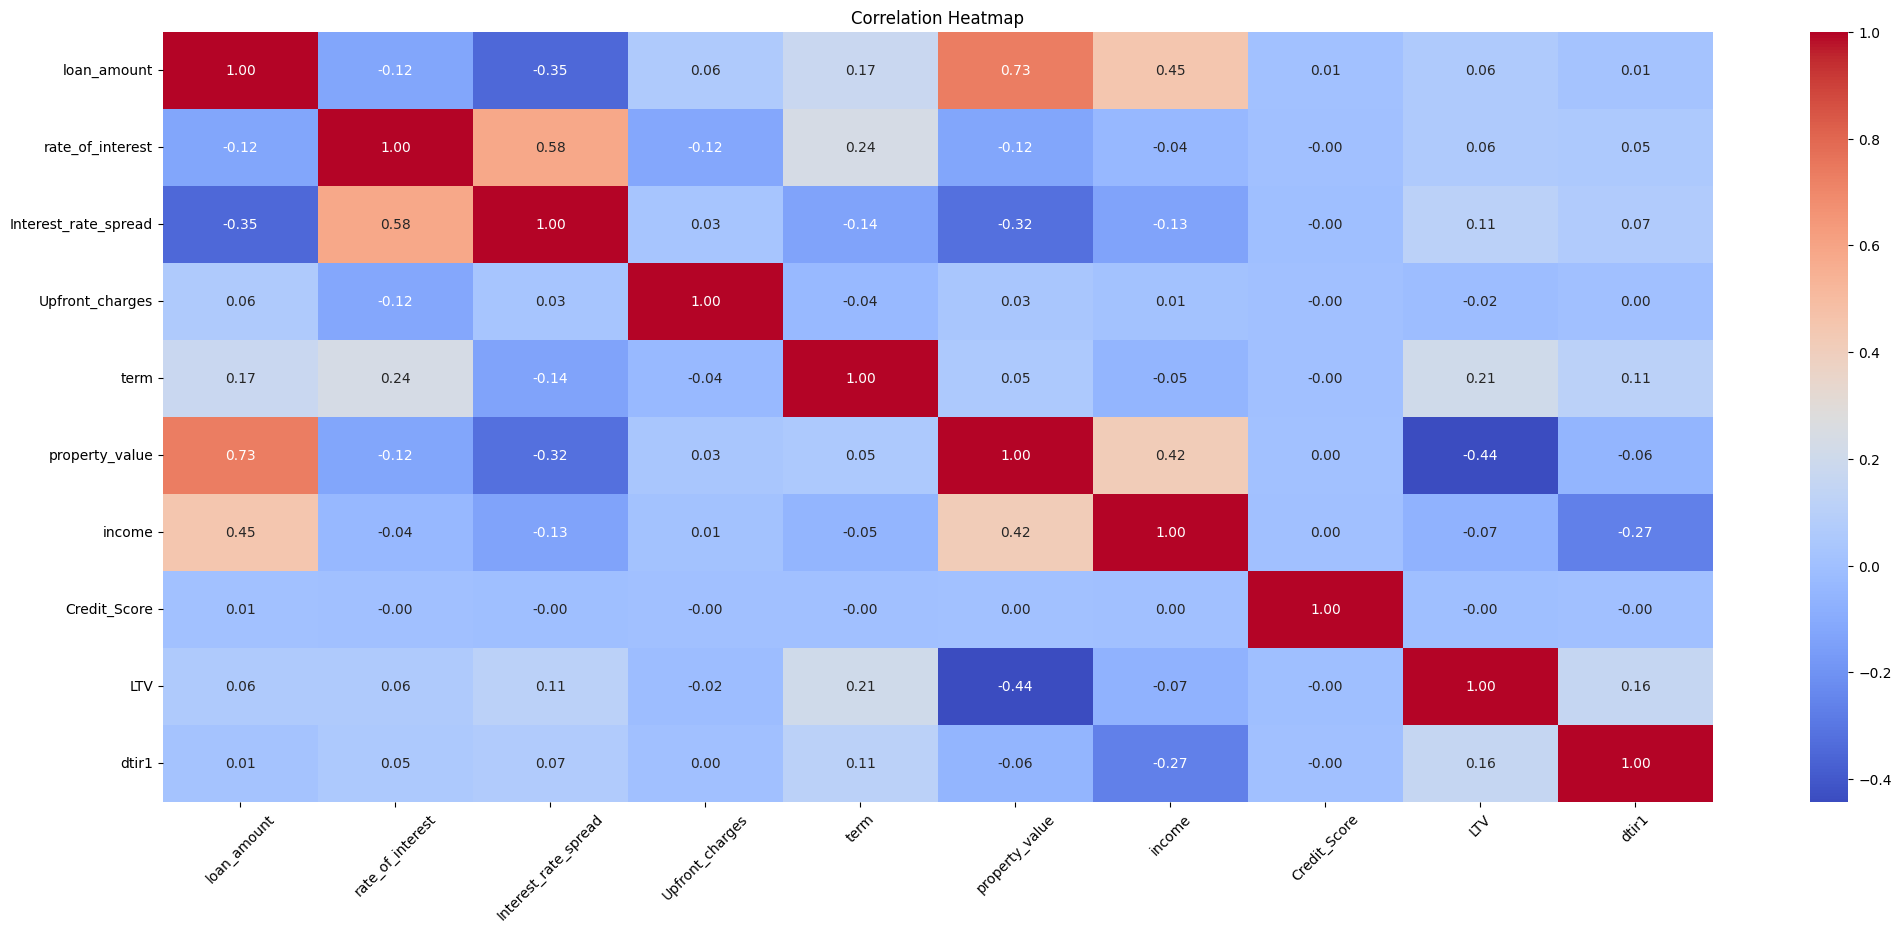

In [ ]:
# Computing for correlation matrix
correlation_matrix = df.corr()

# heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", cmap='coolwarm')

# Customize plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()

### **Dropping Columns Deemed Redundant and Irrelevant to the cause.**

In [ ]:
# a list of redundant and irrevant columns to drop
to_drop = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'age', 'submission_of_application', 'Region',
       'Security_Type']

# Drop those columns from the dataset
df = df.drop(to_drop, axis = 1)

df.head()


,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,-1.165910,0.000000,0.000000,-1.536127e-16,0.439043,-1.046340,-0.811471,0.503202,1.440795,2.26596,0.689809
2,0.422340,0.947589,-0.606882,-9.438772e-01,0.439043,0.010538,0.378468,1.159177,0.451865,-0.441314,0.784627
3,0.696177,0.327474,0.476342,-1.536127e-16,0.439043,0.417030,0.747441,-0.972741,-0.110693,-0.441314,0.405354
4,2.010591,-0.172619,-0.372221,-1.144867e+00,0.439043,0.688024,0.526057,-0.843272,1.079125,-0.441314,0.120900
5,2.065358,-0.192623,-0.714304,-1.019882e+00,0.439043,1.365511,0.470711,1.418114,-0.073037,-0.441314,0.215718


In [ ]:
#Convert the Status column into integer
convert_dict = {'Status': int}

df = df.astype(convert_dict)
print(df.dtypes)

loan_amount             float64
rate_of_interest        float64
Interest_rate_spread    float64
Upfront_charges         float64
term                    float64
property_value          float64
income                  float64
Credit_Score            float64
LTV                     float64
Status                    int64
dtir1                   float64
dtype: object


In [ ]:


#Replacing 2 with 1 in the label column
df['Status'] = df['Status'].replace('2','1')
print(df)


        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0         -1.165910          0.000000              0.000000    -1.536127e-16   
2          0.422340          0.947589             -0.606882    -9.438772e-01   
3          0.696177          0.327474              0.476342    -1.536127e-16   
4          2.010591         -0.172619             -0.372221    -1.144867e+00   
5          2.065358         -0.192623             -0.714304    -1.019882e+00   
...             ...               ...                   ...              ...   
148665     0.586642         -1.922943             -0.478291     2.219600e+00   
148666     1.408151          2.207822              0.866844    -1.144867e+00   
148667     0.641409         -1.922943             -0.873522    -7.305105e-01   
148668    -0.727772         -1.172804              0.254293     3.155450e-01   
148669     0.422340          0.577520              2.066498     8.819206e-01   

            term  property_value    inc

### **Checking for Balanced nature of the label column**

In [ ]:
from collections import Counter
status=dict(Counter(df1['Status']))
status

{1: 19647, 0: 100879}

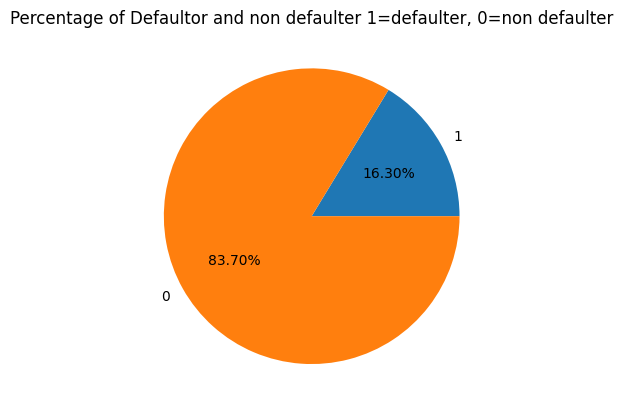

In [ ]:
plt.pie(status.values(),labels=status.keys(),autopct='%1.2f%%');
plt.title('Percentage of Defaultor and non defaulter 1=defaulter, 0=non defaulter');

In [ ]:
100879/2


50439.5

**Handling Inbalanced data**

In [ ]:
#handle imbalance, undersampling
#shuffle dataset
shuffled_df = df.sample(frac=1, random_state=4)

#separate all fraud class in a separate dataset
d_df = shuffled_df.loc[shuffled_df['Status'] == 1]

#random select 50439 observations from non-fraud(majority class)
non_d_df = shuffled_df.loc[shuffled_df['Status'] == 0].sample(n=50439, random_state=42)

#concatenate both frames again
normalized_df = pd.concat([d_df, non_d_df])

df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,-1.165910,0.000000,0.000000,-1.536127e-16,0.439043,-1.046340,-0.811471,0.503202,1.440795,2,0.689809
2,0.422340,0.947589,-0.606882,-9.438772e-01,0.439043,0.010538,0.378468,1.159177,0.451865,0,0.784627
3,0.696177,0.327474,0.476342,-1.536127e-16,0.439043,0.417030,0.747441,-0.972741,-0.110693,0,0.405354
4,2.010591,-0.172619,-0.372221,-1.144867e+00,0.439043,0.688024,0.526057,-0.843272,1.079125,0,0.120900
5,2.065358,-0.192623,-0.714304,-1.019882e+00,0.439043,1.365511,0.470711,1.418114,-0.073037,0,0.215718


In [ ]:
# Replace 2 with 1 in the label Column
df['Status'] = df['Status'].replace(2,1)
print(df)

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0         -1.165910          0.000000              0.000000    -1.536127e-16   
2          0.422340          0.947589             -0.606882    -9.438772e-01   
3          0.696177          0.327474              0.476342    -1.536127e-16   
4          2.010591         -0.172619             -0.372221    -1.144867e+00   
5          2.065358         -0.192623             -0.714304    -1.019882e+00   
...             ...               ...                   ...              ...   
148665     0.586642         -1.922943             -0.478291     2.219600e+00   
148666     1.408151          2.207822              0.866844    -1.144867e+00   
148667     0.641409         -1.922943             -0.873522    -7.305105e-01   
148668    -0.727772         -1.172804              0.254293     3.155450e-01   
148669     0.422340          0.577520              2.066498     8.819206e-01   

            term  property_value    inc

# Seperating the data into target and features

In [ ]:

X = df.drop('Status', axis=1)  # Features
y = df['Status']               # Target variable

Target = y
data = X

In [ ]:
Target

0         1
2         0
3         0
4         0
5         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 120526, dtype: int64

In [ ]:
Target.unique()

array([1, 0])

In [ ]:
data

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,-1.165910,0.000000,0.000000,-1.536127e-16,0.439043,-1.046340,-0.811471,0.503202,1.440795,0.689809
2,0.422340,0.947589,-0.606882,-9.438772e-01,0.439043,0.010538,0.378468,1.159177,0.451865,0.784627
3,0.696177,0.327474,0.476342,-1.536127e-16,0.439043,0.417030,0.747441,-0.972741,-0.110693,0.405354
4,2.010591,-0.172619,-0.372221,-1.144867e+00,0.439043,0.688024,0.526057,-0.843272,1.079125,0.120900
5,2.065358,-0.192623,-0.714304,-1.019882e+00,0.439043,1.365511,0.470711,1.418114,-0.073037,0.215718
...,...,...,...,...,...,...,...,...,...,...
148665,0.586642,-1.922943,-0.478291,2.219600e+00,-2.562820,0.281533,0.129411,-0.351291,0.017005,0.974263
148666,1.408151,2.207822,0.866844,-1.144867e+00,0.439043,0.769323,0.018719,-1.128103,0.156349,-2.154733
148667,0.641409,-1.922943,-0.873522,-7.305105e-01,-2.562820,0.606726,-0.018178,0.019852,-0.535909,1.069081
148668,-0.727772,-1.172804,0.254293,3.155450e-01,-2.562820,-0.612749,0.018719,0.321946,-0.041631,-0.827280


## **5.MODELLING AND EVALUATION**

## **Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y ,test_size=0.25,random_state=42,stratify=y)


In [ ]:
#Oversampling using SMOTE

from imblearn.over_sampling import SMOTE

#instantiate
smote = SMOTE(random_state=42)

#apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#count of each class

print(np.bincount(y_train_resampled))


[75659 75659]


In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (90394, 10)
Training Labels Shape: (90394,)
Testing Features Shape: (30132, 10)
Testing Labels Shape: (30132,)


# Training the KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)



# Evaluating the KNN Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score,roc_curve, auc


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25220
           1       0.82      0.98      0.89      4912

    accuracy                           0.96     30132
   macro avg       0.91      0.97      0.94     30132
weighted avg       0.97      0.96      0.96     30132



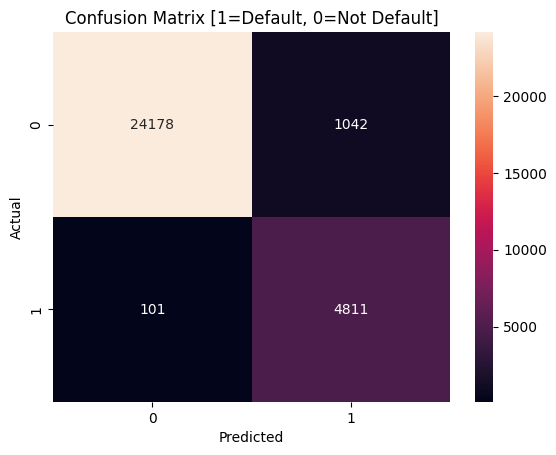

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")
plt.xlabel("Predicted"),
plt.ylabel("Actual"),
plt.title("Confusion Matrix [1=Default, 0=Not Default]")

print(classification_report(y_test, y_pred))


ROC for KNN

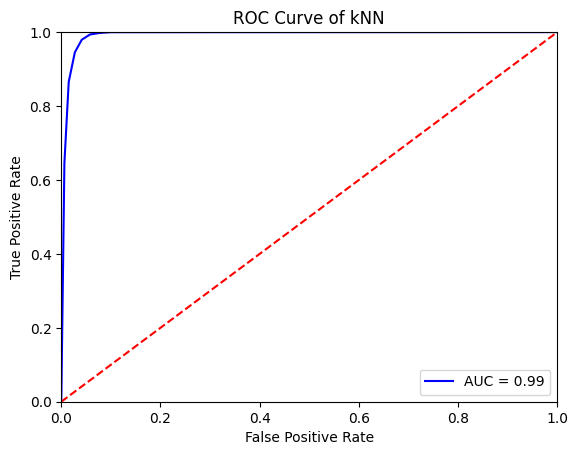

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Training and Evaluating the Decision Tree Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25220
           1       1.00      1.00      1.00      4912

    accuracy                           1.00     30132
   macro avg       1.00      1.00      1.00     30132
weighted avg       1.00      1.00      1.00     30132



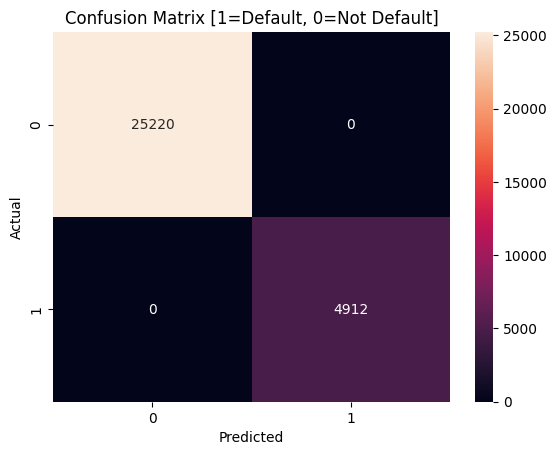

In [ ]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")
plt.xlabel("Predicted"),
plt.ylabel("Actual"),
plt.title("Confusion Matrix [1=Default, 0=Not Default]")

print(classification_report(y_test, y_pred))

ROC for Decision Tree


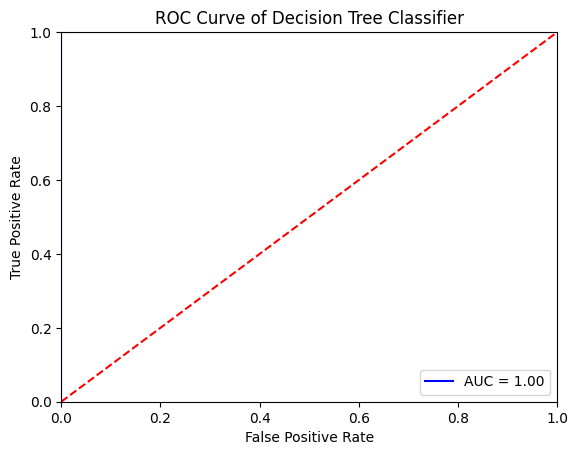

In [ ]:

y_scores = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [ ]:
# Import necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot


# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X, y)

# Select one tree from the forest
tree = rfc.estimators_[0]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25220
           1       1.00      1.00      1.00      4912

    accuracy                           1.00     30132
   macro avg       1.00      1.00      1.00     30132
weighted avg       1.00      1.00      1.00     30132



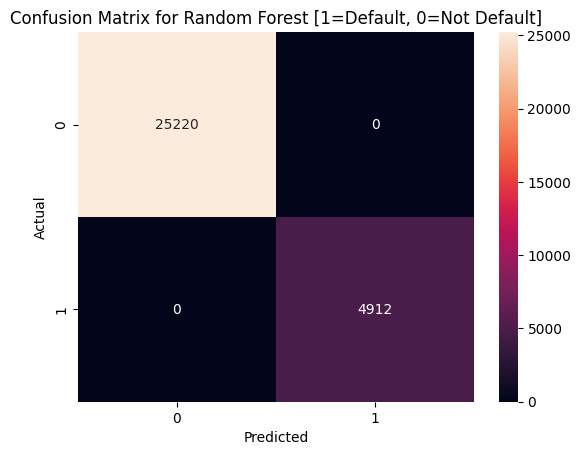

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")
plt.xlabel("Predicted"),
plt.ylabel("Actual"),
plt.title("Confusion Matrix for Random Forest [1=Default, 0=Not Default]")

print(classification_report(y_test, y_pred))

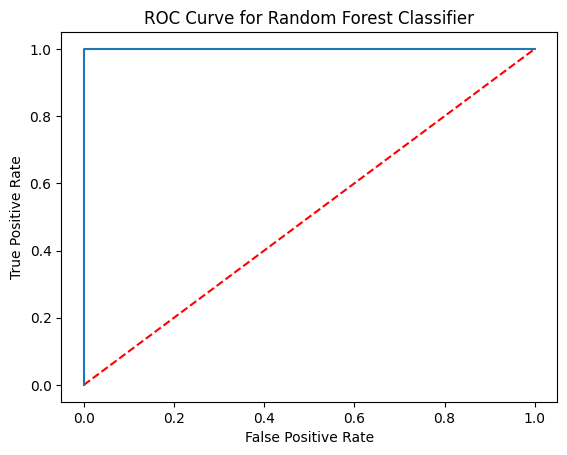

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()


# <h1 style='text-align: center;'> The End </h1>
# <h1 style='text-align: center;'> Thank You </h1>

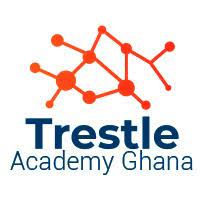